In [1]:

import sys
import pandas as pd
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\my_seqfold')
from fold import fold, my_fold, dot_bracket
sys.path.append(r'C:\Users\clima\Desktop\Aptamers\src')
import numpy as np
from APTamers import  Aptamer_Fold
from tqdm import tqdm
import forgi.visual.mplotlib as fvm
import forgi
from forgi.graph.bulge_graph import BulgeGraph
import matplotlib.pyplot as plt
from minimization import ty_fold
from energy_functions import _hairpin, _stack, _bulge, _internal_loop, _multi_branch, compute_energy
import time



df = pd.read_csv(r'C:\Users\clima\Desktop\Aptamers\data\preprocessed _files\UNAfold_merged_all.csv')
print('Numeber sequences after merge:',len(df))
df = df.drop_duplicates(subset='Sequence')
print('Numeber of unique sequences after preprocessing:',len(df))

Numeber sequences after merge: 4933
Numeber of unique sequences after preprocessing: 4933


In [11]:
df['Sequence'][65]

'GGGACGACGGGGCACATTGTGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCCGCCTAGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCCGCCTAGCTATTCAGTTGTTCCGCAGGAGAGTCGTCCC'

C:\Users\clima\AppData\Local\Temp\ipykernel_8544\459252041.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sequence'][i]='TGTCAGAAGTTTCCAAATGGCCAGCAATCAACCCATTCCATTGGGGATACAATGGTACAGTTTCGCATATTGTCGGTGAAAATGGTTCCATTAAACTCC'
C:\Users\c

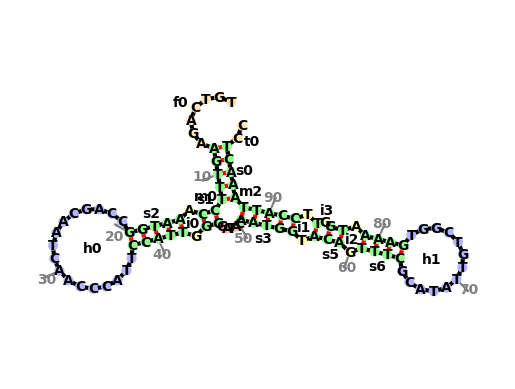

In [19]:
i=65
df['Sequence'][i]='TGTCAGAAGTTTCCAAATGGCCAGCAATCAACCCATTCCATTGGGGATACAATGGTACAGTTTCGCATATTGTCGGTGAAAATGGTTCCATTAAACTCC'
structs = ty_fold(df['Sequence'][i])
d_b = dot_bracket( df['Sequence'][i], structs)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [21]:
sss = 0
sss1 = 0
for s, ss in zip(structs, structs1):    
    sss +=s.e
    sss1 +=ss.e
    print(s, ss)
print(sss, sss1)

   7   96   -1.3  STACK:AG/TC        7   96   -1.3  STACK:AG/TC    
   8   95   -1.5  STACK:GT/CA        8   95   -1.5  STACK:GT/CA    
   9   94   -1.0  STACK:TT/AA        9   94   -1.0  STACK:TT/AA    
  10   93   -1.0  STACK:TT/AA       10   93   -1.0  STACK:TT/AA    
  11   92    4.2  BIFURCATION:5n/3h   11   92    1.2  BIFURCATION:9n/3h
  12   44   -1.8  STACK:CC/GG       13   43   -0.8  STACK:CAA/GGT  
  13   43   -0.8  STACK:CAA/GGT     15   41   -1.0  STACK:AA/TT    
  15   41   -1.0  STACK:AA/TT       16   40   -0.9  STACK:AT/TA    
  16   40   -0.9  STACK:AT/TA       17   39   -1.5  STACK:TG/AC    
  17   39   -1.5  STACK:TG/AC       18   38   -1.8  STACK:GG/CC    
  18   38   -1.8  STACK:GG/CC       19   37    4.7  HAIRPIN:GC/CT  
  19   37    4.7  HAIRPIN:GC/CT     51   90   -0.9  STACK:AT/TA    
  50   91   -1.0  STACK:AA/TT       52   89   -1.5  STACK:TG/AC    
  51   90   -0.9  STACK:AT/TA       53   88   -1.8  STACK:GG/CC    
  52   89   -1.5  STACK:TG/AC       54   87 

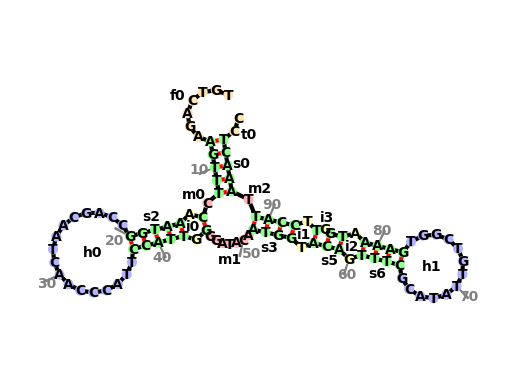

In [20]:
i=65
structs1 = fold(df['Sequence'][i])
d_b = dot_bracket( df['Sequence'][i], structs1)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

In [16]:
times = []
structures = []
energy = []
for count, seq in  tqdm(enumerate(df['Sequence'])):
    start_time = time.time()
    structs = fold(seq)
    times.append(time.time()-start_time)
    structures.append(structs)
    e_sum = 0
    for s in structs:
        e_sum+=s.e
    energy.append(e_sum)
    if count == 100:
        break
'''
d_b = dot_bracket( df['Sequence'][i], structs)
bg = BulgeGraph.from_dotbracket( d_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()
'''
print(np.mean(times))
print(np.mean(energy))

100it [00:29,  3.41it/s]

0.2895709240790641
-9.609900990099012


In [17]:
my_times = []
my_structures = []
my_energy = []
for count, seq in  tqdm(enumerate(df['Sequence'])):
        start_time = time.time()
        structs = ty_fold(seq)
        my_times.append(time.time()-start_time)
        my_structures.append(structs)
        e_sum = 0
        for s in structs:
            e_sum+=s.e
        my_energy.append(e_sum)
        if count == 100:
            break
print(np.mean(my_times))

100it [00:29,  3.40it/s]

0.290533438767537


In [18]:
print(np.mean(my_energy))

-9.67623762376238


In [8]:
np.argmax(my_times)

65

In [3]:
'({}, {})'.format(*(1,2))

'(1, 2)'

In [ ]:
np.sum(my_times)

33.84689688682556

In [ ]:
i = 0
my_structs = my_fold( df['Sequence'][i])
myd_b = dot_bracket( df['Sequence'][i], my_structs)
bg = BulgeGraph.from_dotbracket( myd_b  ,  df['Sequence'][i])
fvm.plot_rna(bg, text_kwargs={"fontweight":"black"}, lighten=0.7,backbone_kwargs={"linewidth":3})
plt.show()

TypeError: unsupported operand type(s) for -: 'list' and 'int'